<a href="https://colab.research.google.com/github/Tiasha-26/Assignments-code-/blob/main/Smoothing%20through%20Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [ ]:
# mesh grid
x = np.linspace(-10,10,64)  # taking random values for gaussian random f
y = np.linspace(-10,10,64)
z=  np.linspace(-10,10,64)
xm , ym , zm  = np.meshgrid(x,y,z)

g = np.random.normal(0,1,size =( 64 , 64 , 64))   # gaussian random field

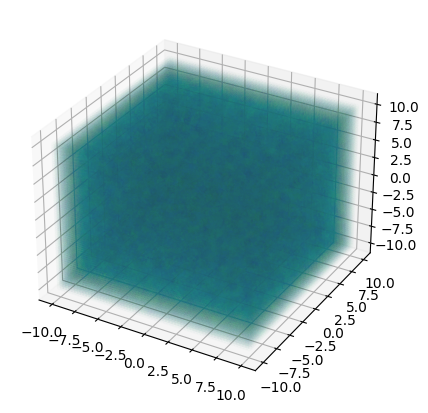

In [ ]:
# 3d



fig = plt.figure(figsize =(5,5))

#plt.subplot(1,3,1)
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xm,ym,zm , c = g , alpha = 0.01)  # plotting gaussian random field
plt.show()






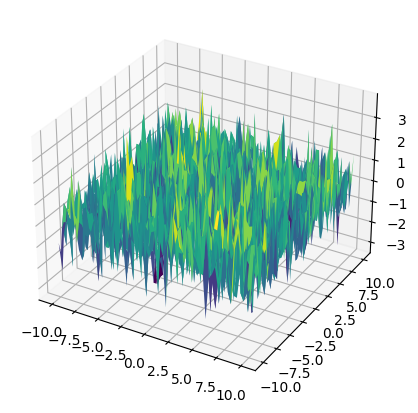

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = "3d")
ax.plot_surface(xm[:,:,0], ym[:,:,0],g[:,:,0],cmap ="viridis")  # plotting in z= 0 plane
# ax.plot_surface(xm[:,:,0], zm[:,:,0],g[:,:,0],cmap ="viridis")
# ax.plot_surface(ym[:,:,0], zm[:,:,0],g[:,:,0],cmap ="viridis")

array([-3.38103669, -2.64788849, -1.9147403 , -1.1815921 , -0.4484439 ,
        0.28470429,  1.01785249,  1.75100068,  2.48414888,  3.21729708,
        3.95044527])

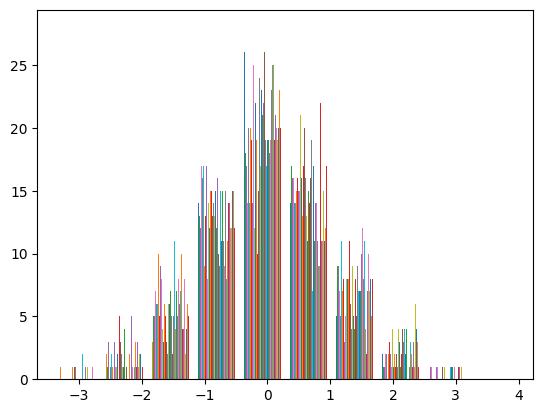

In [ ]:
plt.hist(g[:,:,0])[1]  # just checking whether it is actually gaussian

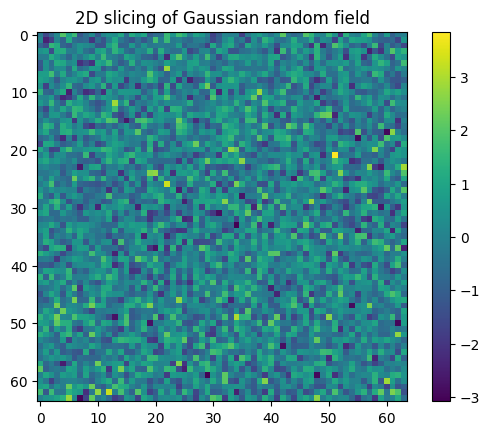

In [ ]:
plt.title("2D slicing of Gaussian random field")
c = plt.imshow(g[5,:,:])
fig.colorbar(c)
plt.show()


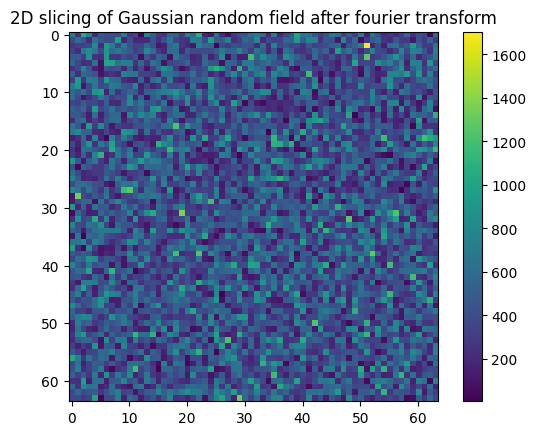

In [ ]:
# gaussian fourier transform
gft = np.fft.fftn(g)
gft_abs = np.abs(gft)  # for plotting
plt.title("2D slicing of Gaussian random field after fourier transform")
c = plt.imshow(gft_abs[5,:,:])
fig.colorbar(c)
plt.show()


In [ ]:
def sphere(r):
  l = 20/64
  s = np.sqrt(xm**2 + ym**2 + zm**2)         # since, i have taken 20length units  in 64 grid units . 1 smallest length unit = 20/64
  sphr = np.zeros([64,64,64])              #sphere

  for x in range (64):
    for y in range (64):
      for z in range (64):
        if s[x,y,z] <= r * l :
          sphr[x, y, z] = 1

  return sphr

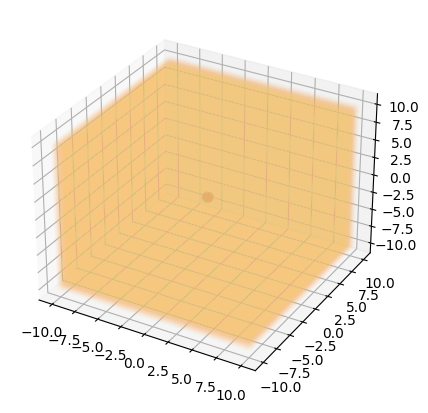

In [ ]:
fig = plt.figure(figsize =(5,5))
#plt.subplot(1,3,1)
ax = fig.add_subplot(projection='3d')
ax.scatter3D(xm,ym,zm , c = -sphere(1),alpha=0.04, cmap ='copper' )  # plotting sphere  of radius = 1
ax.set_facecolor('none')
plt.show()



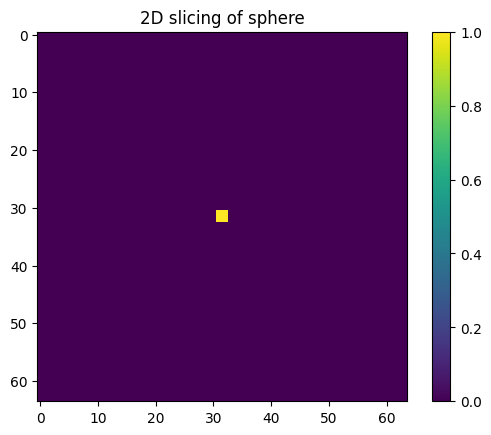

In [ ]:
plt.title("2D slicing of sphere")
c = plt.imshow(sphere(1)[32,:,:])
fig.colorbar(c)
plt.show()

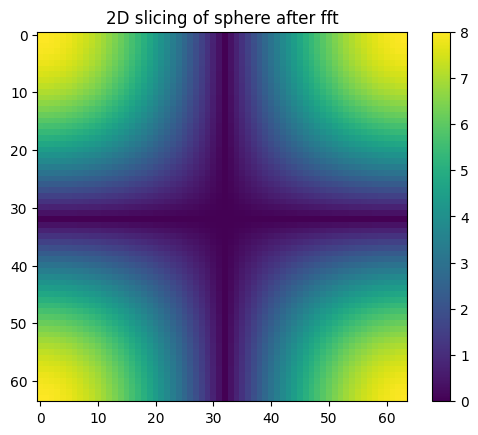

In [ ]:
# fourier transform of sphere
sft =  np.fft.fftn(sphere(1))
sft_abs = np.abs(sft)

plt.title("2D slicing of sphere after fft")
c = plt.imshow(sft_abs[0,:,:])
fig.colorbar(c)
plt.show()

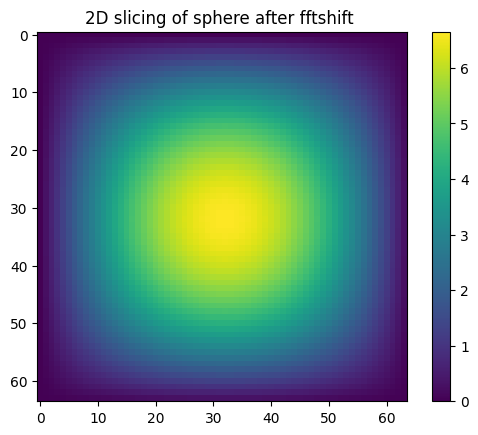

In [ ]:
# after fftshift
sft_shft = np.fft.fftshift(sft)
sft_abs1 = np.abs(sft_shft)
plt.title("2D slicing of sphere after fftshift ")
c = plt.imshow(sft_abs1[20,:,:])
fig.colorbar(c)
plt.show()

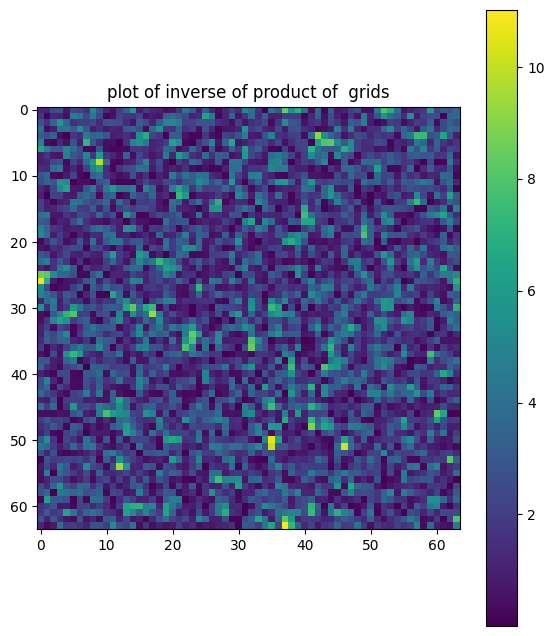

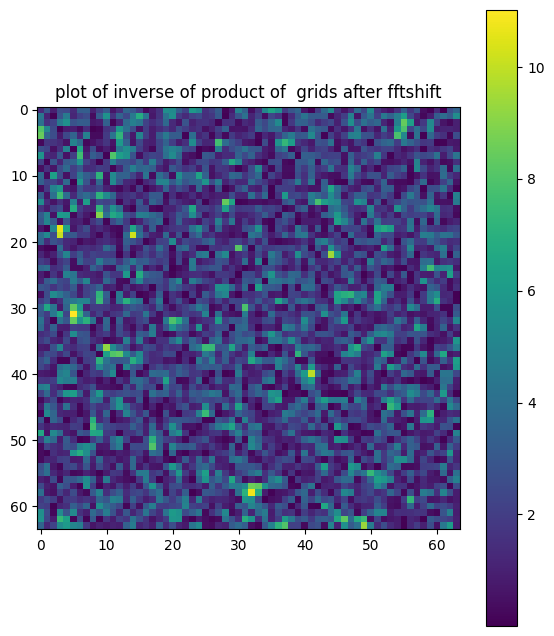

In [ ]:
pdt =  gft * sft    # product of fourier transformed grids

pdt_inv = np.fft.ifftn(pdt)  # inverse fourier transform of product

pdt_inv_abs = np.abs(pdt_inv)

pdt_inv_sft = np.fft.ifftshift(pdt_inv) # fftshift
pd_abs = np.abs(pdt_inv_sft)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title("plot of inverse of product of  grids")
c = plt.imshow(pdt_inv_abs[32,:,:])
fig.colorbar(c)
plt.show()
plt.figure(figsize=(15,8))
plt.subplot(1,2,2)
plt.title("plot of inverse of product of  grids after fftshift")
d = plt.imshow(pd_abs[0,:,:])
fig.colorbar(d)
plt.show()

In [ ]:
radius = np.linspace(1,32,5)

In [ ]:
radius

array([ 1.  ,  8.75, 16.5 , 24.25, 32.  ])

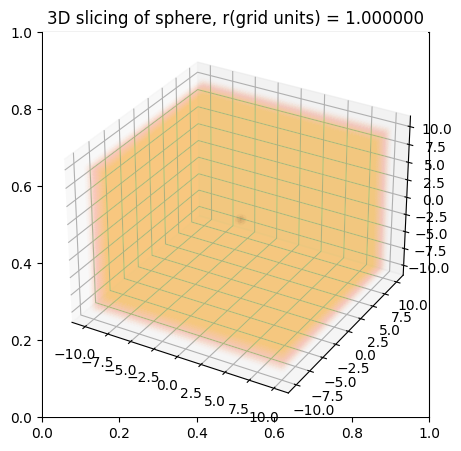

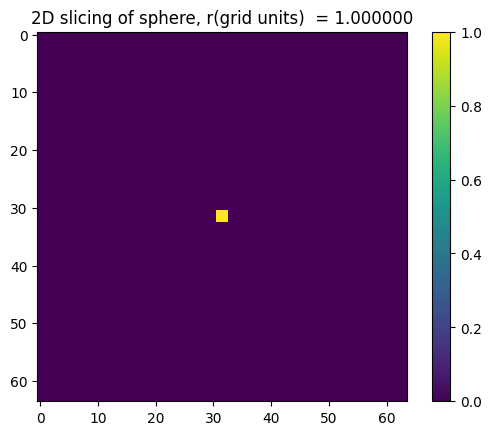

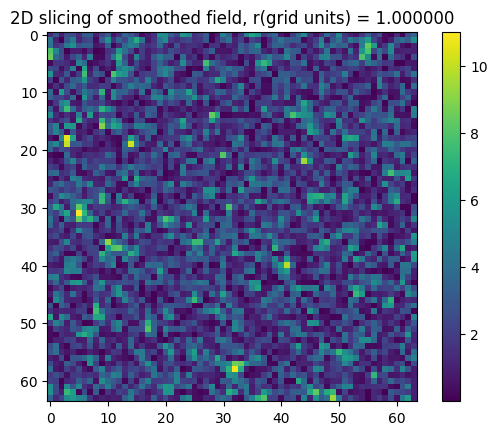

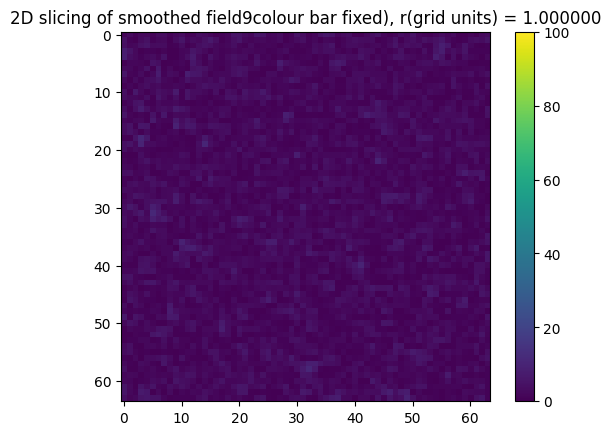

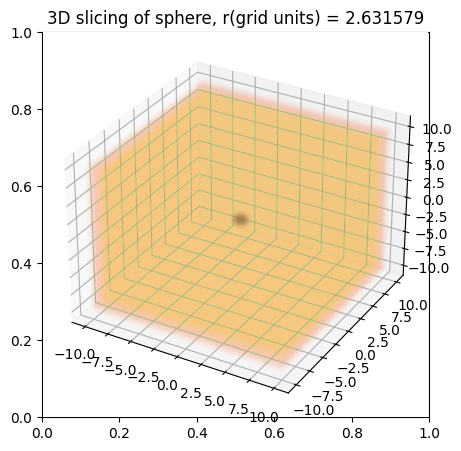

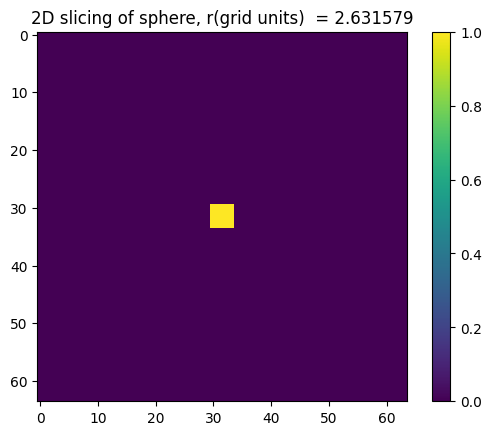

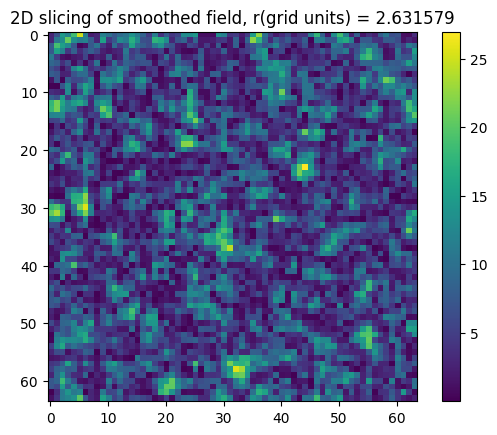

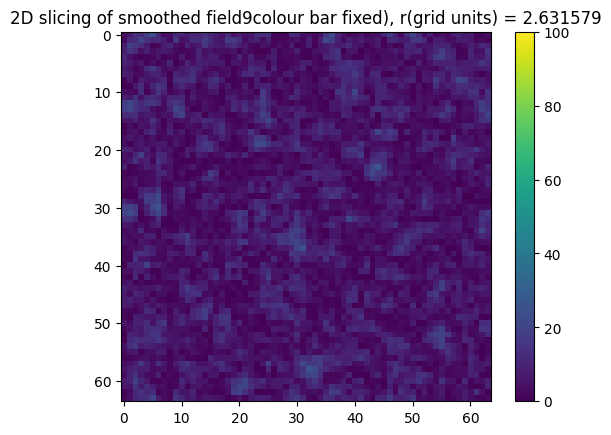

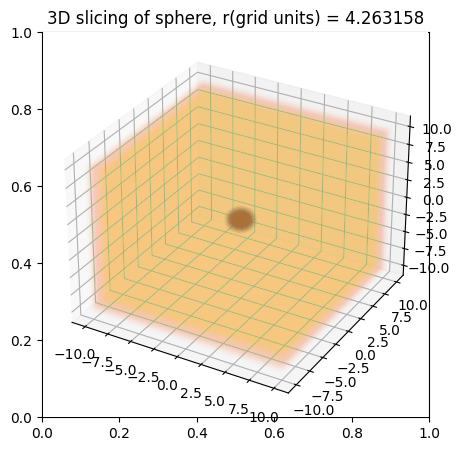

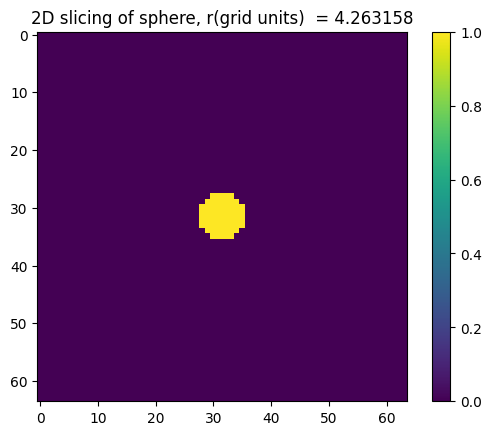

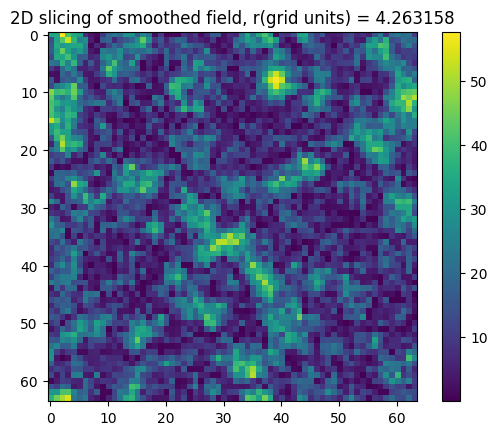

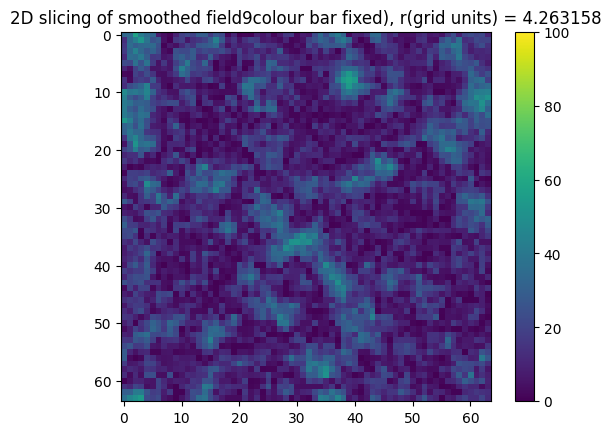

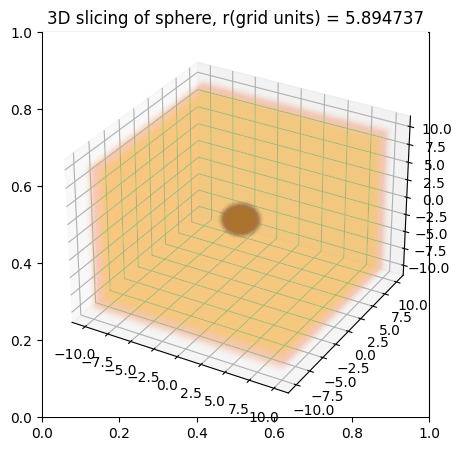

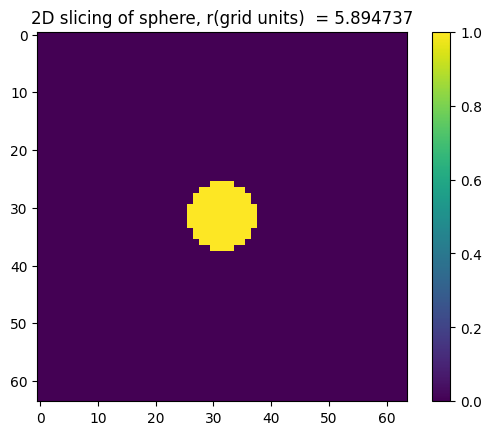

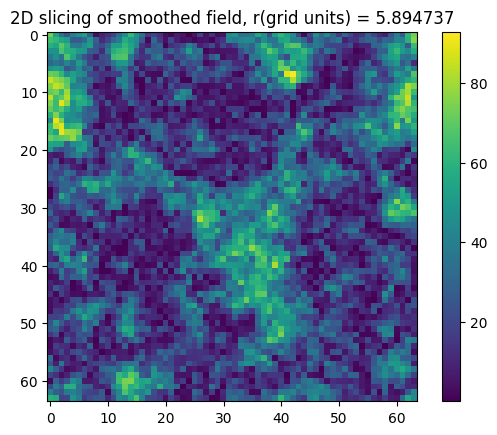

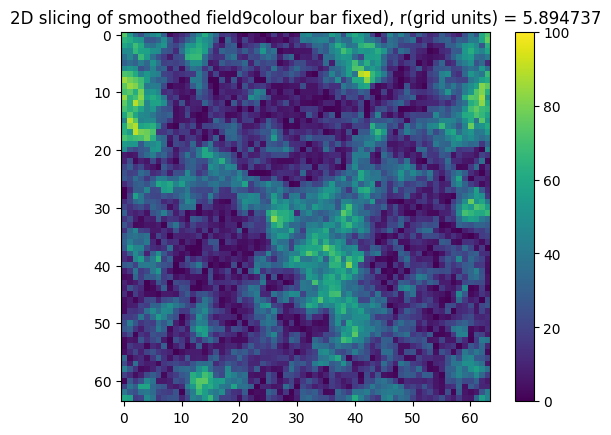

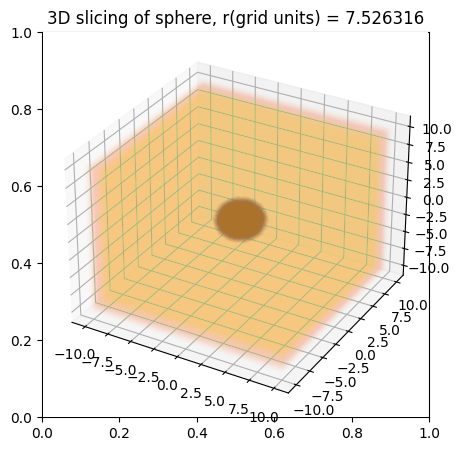

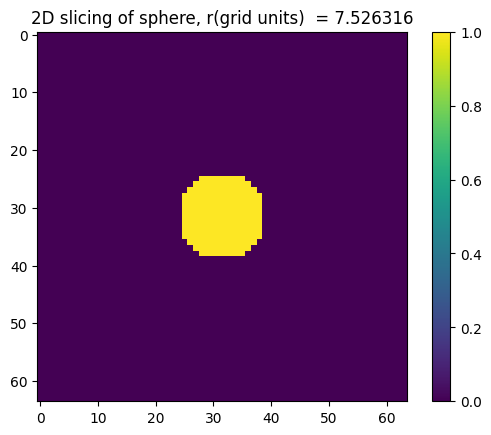

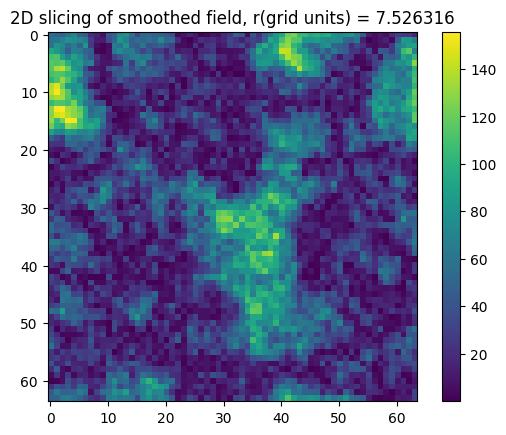

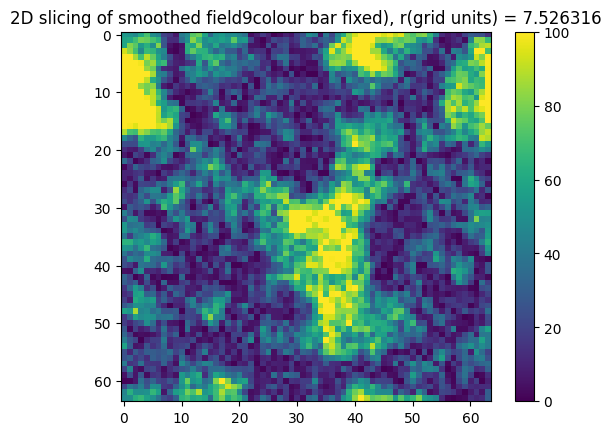

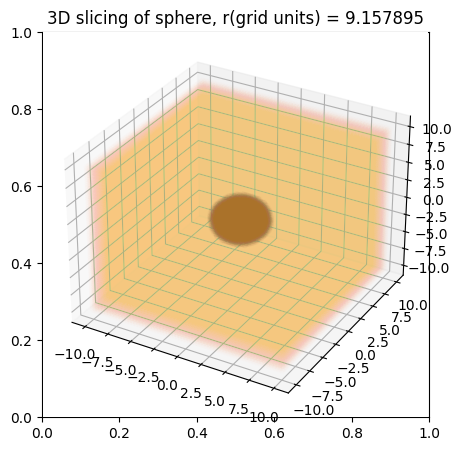

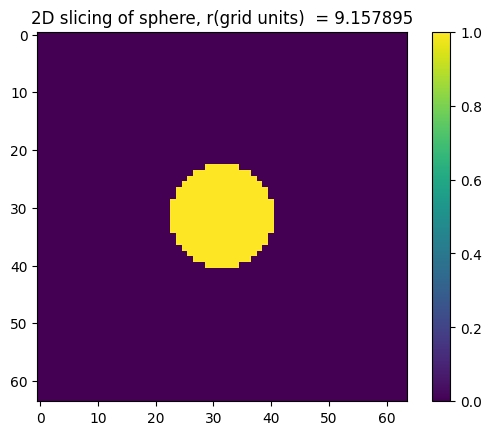

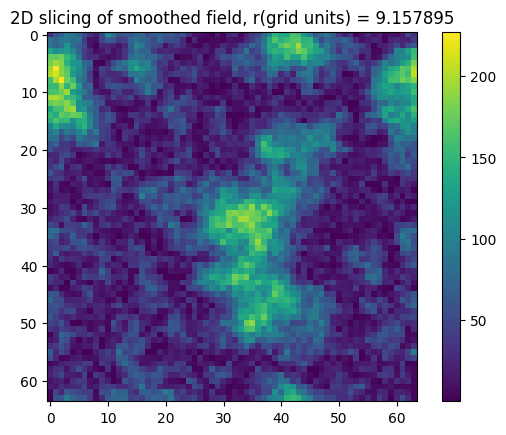

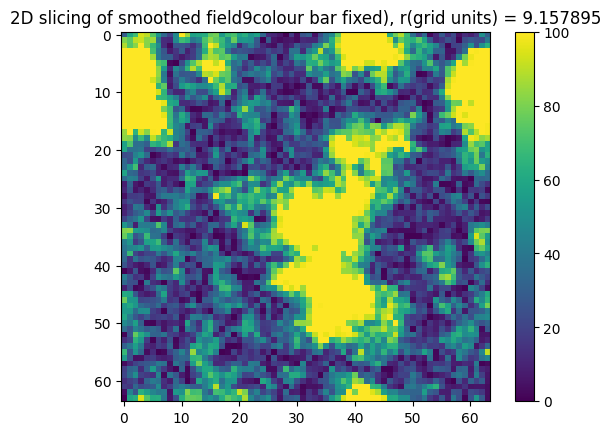

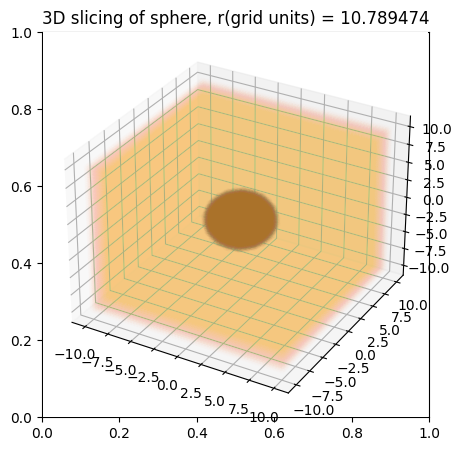

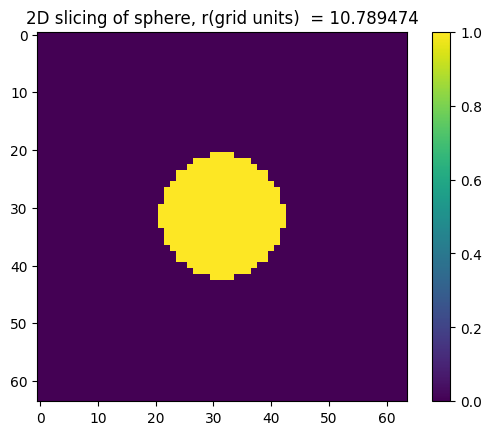

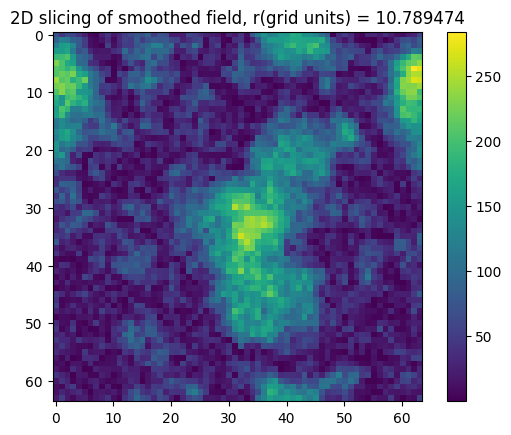

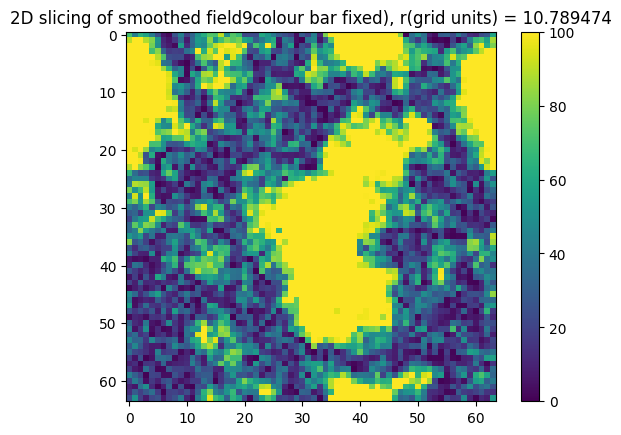

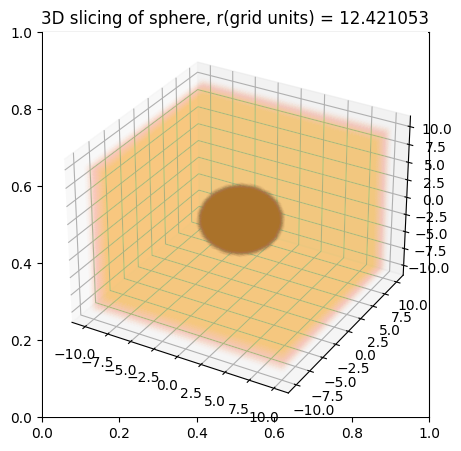

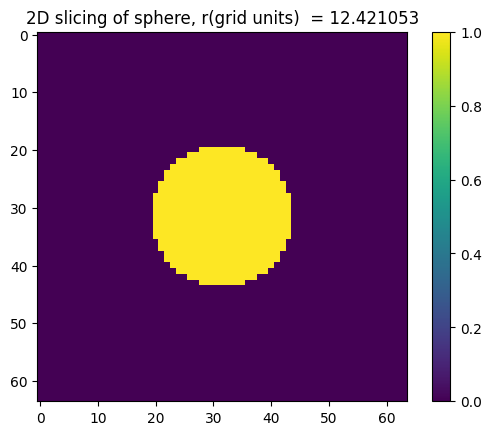

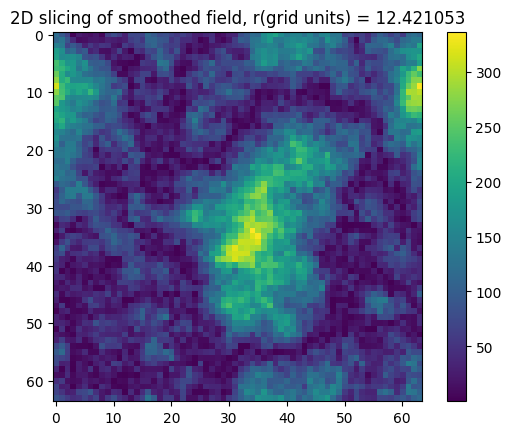

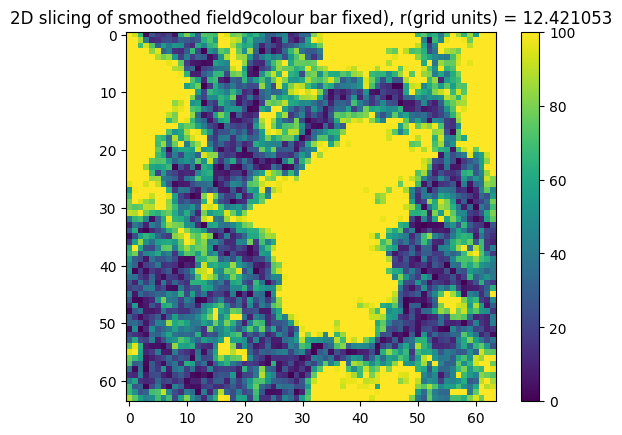

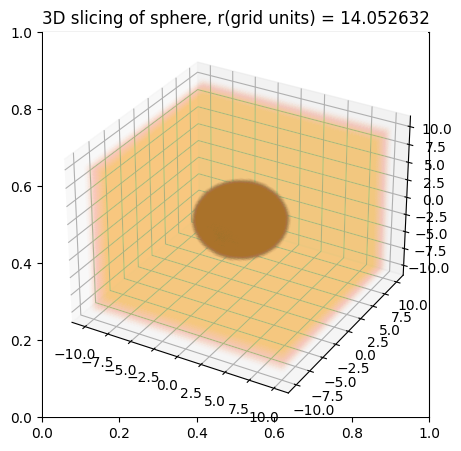

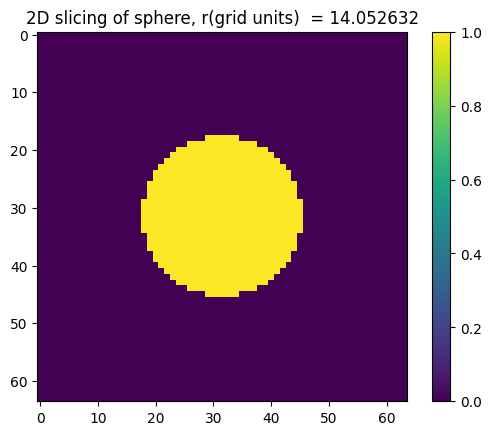

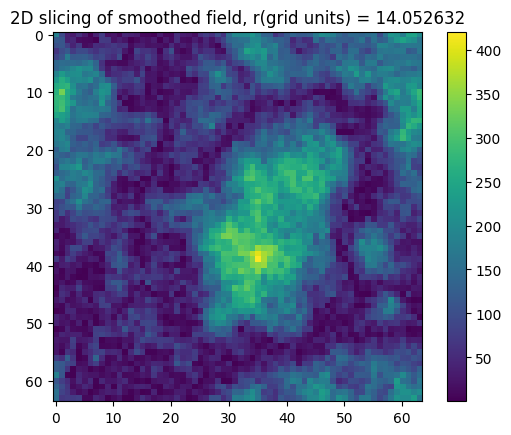

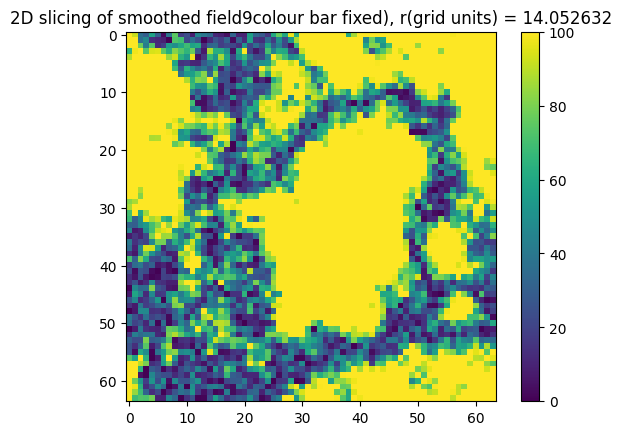

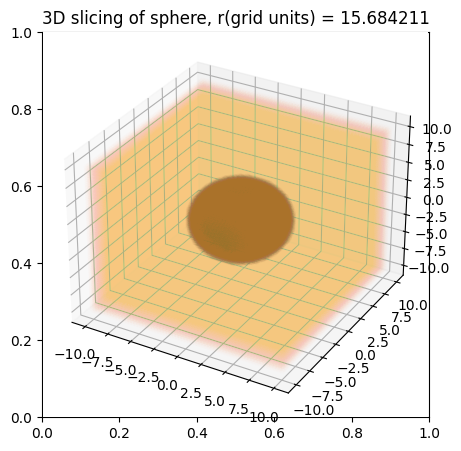

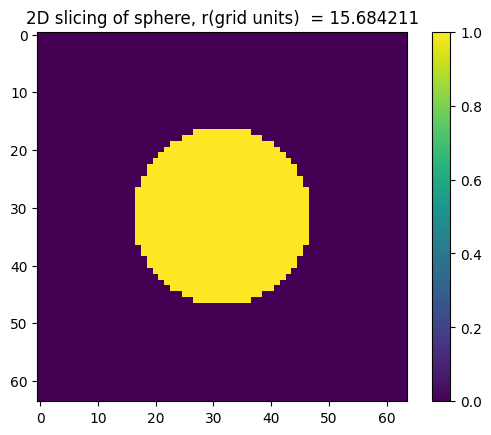

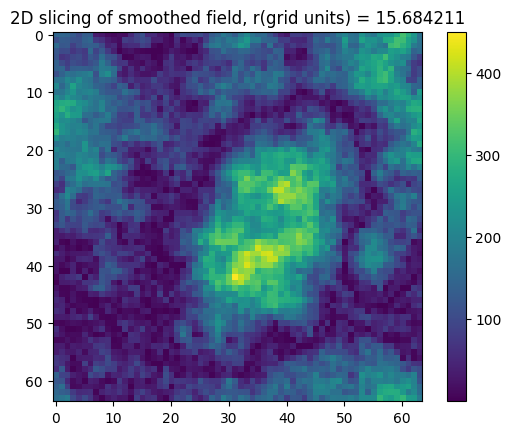

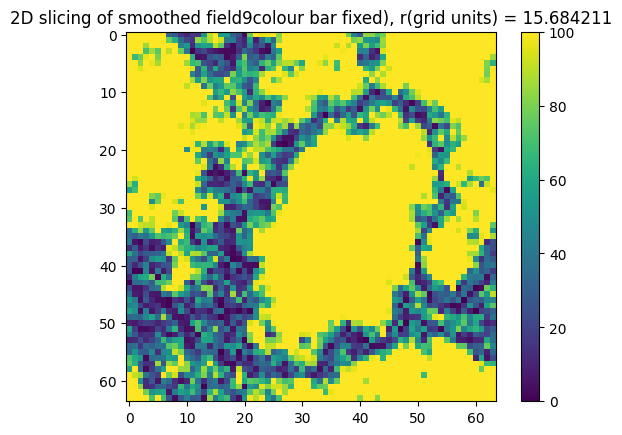

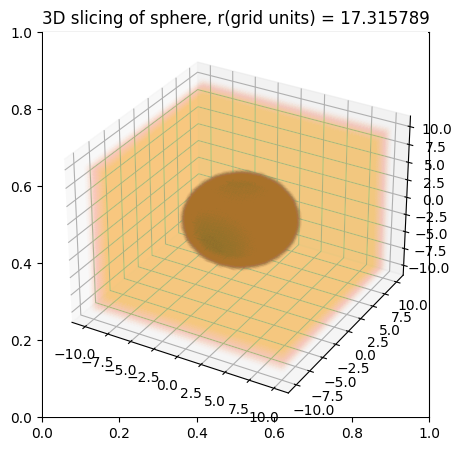

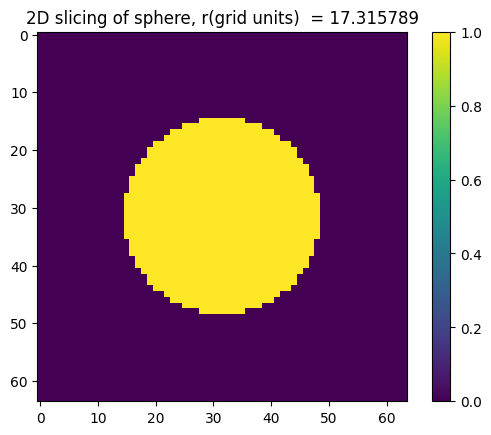

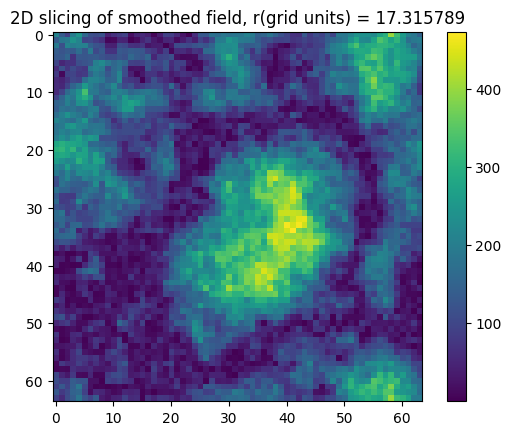

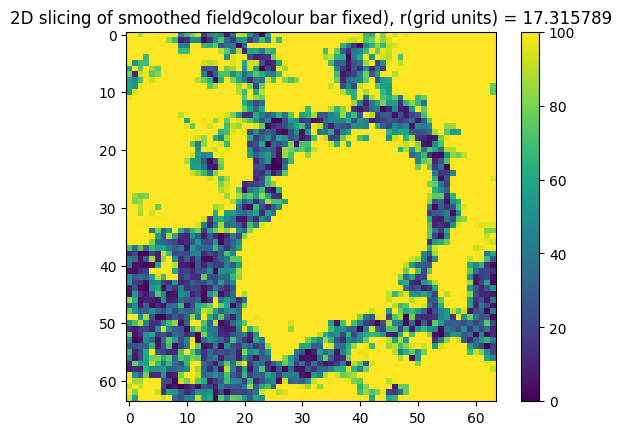

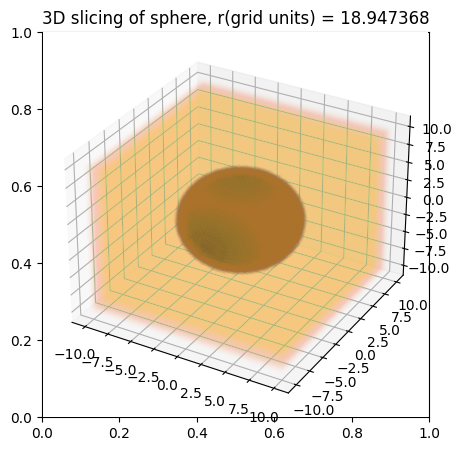

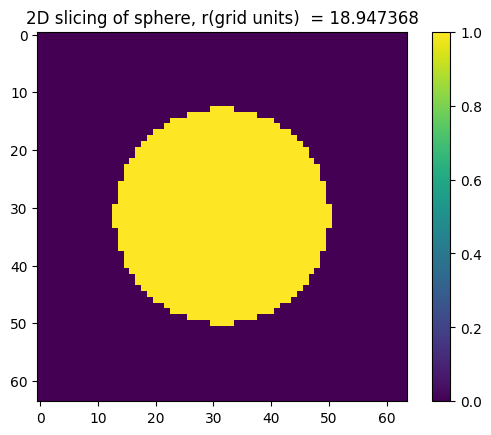

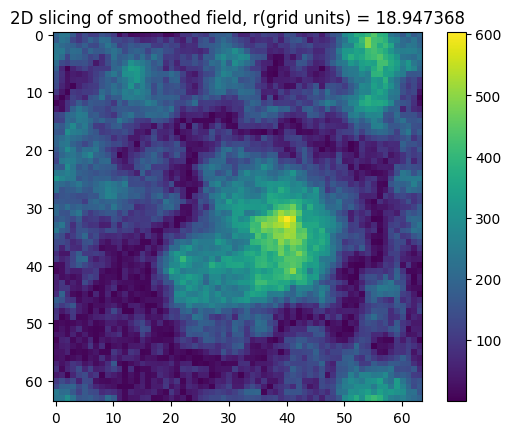

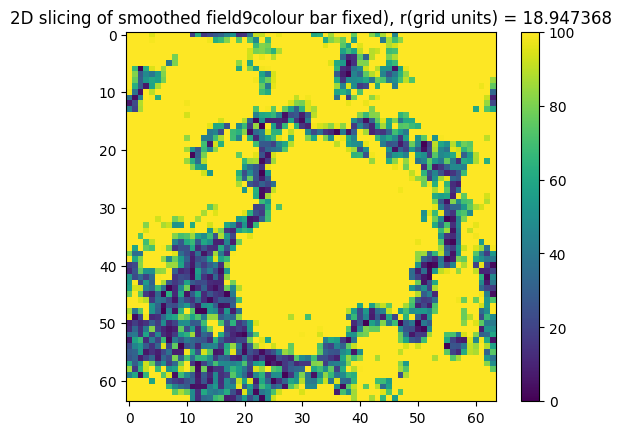

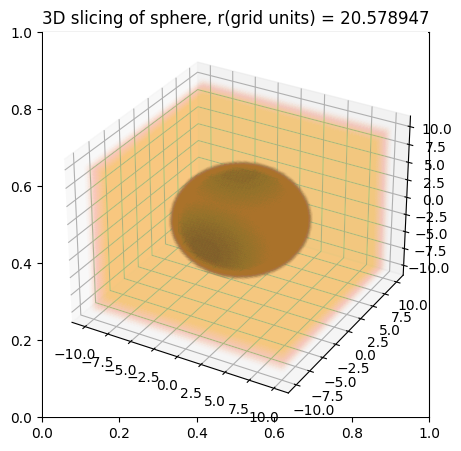

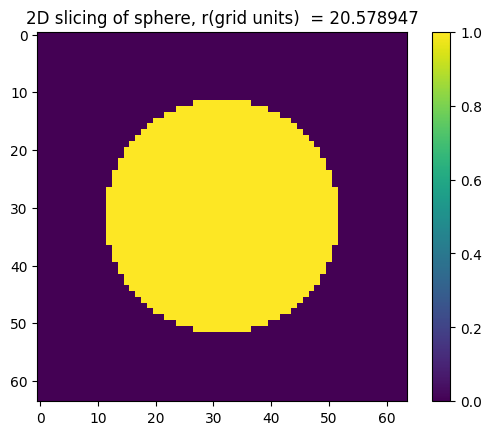

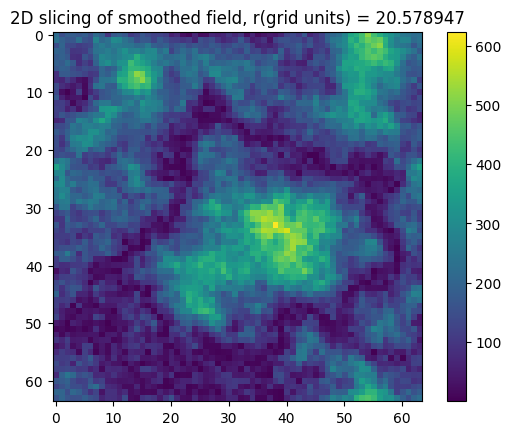

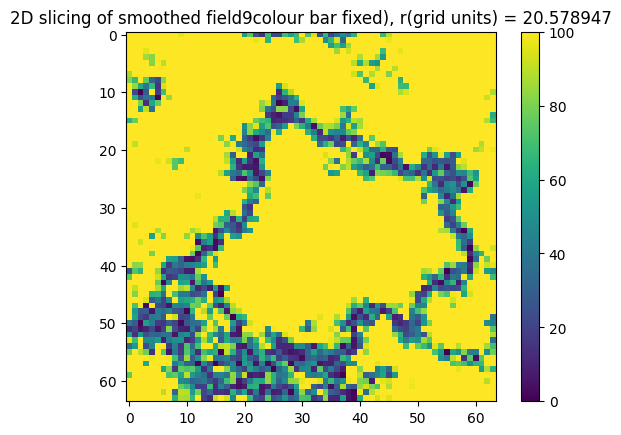

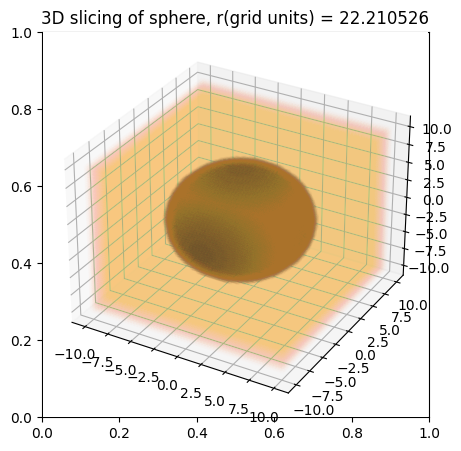

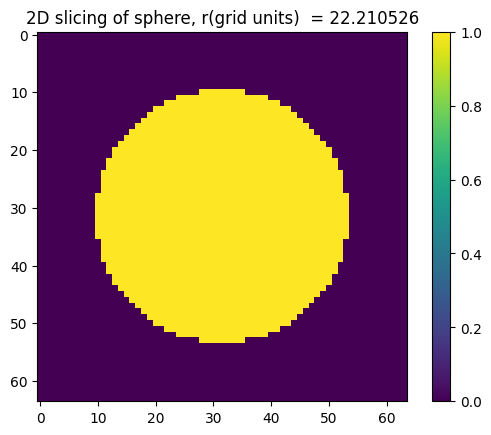

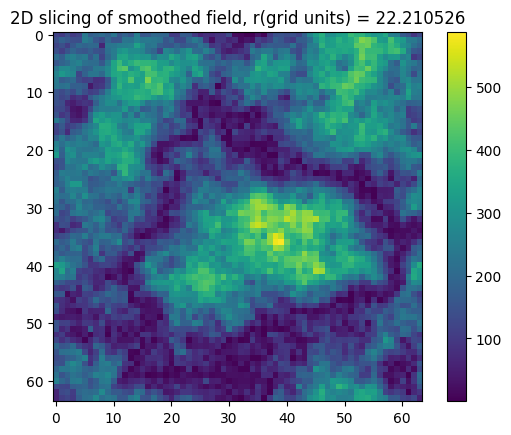

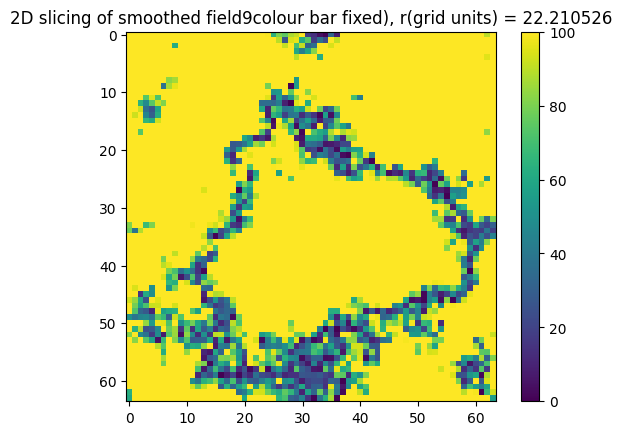

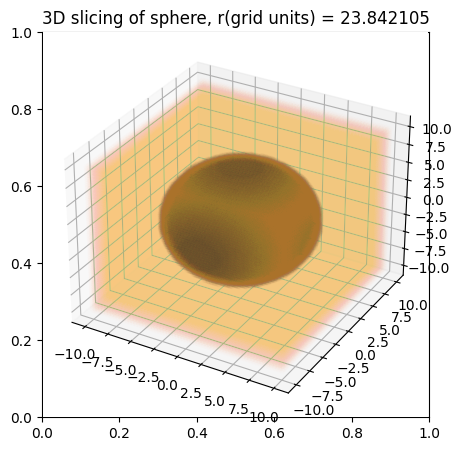

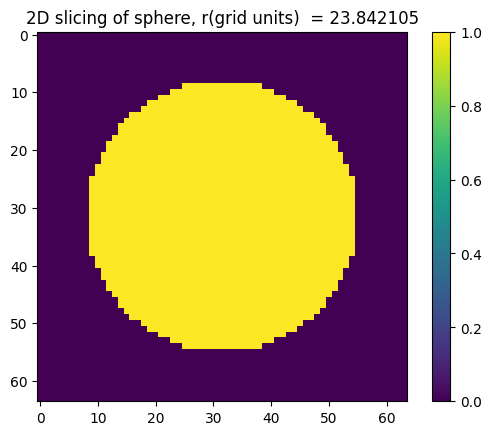

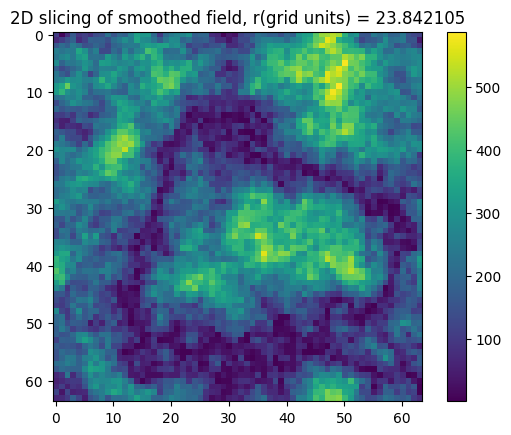

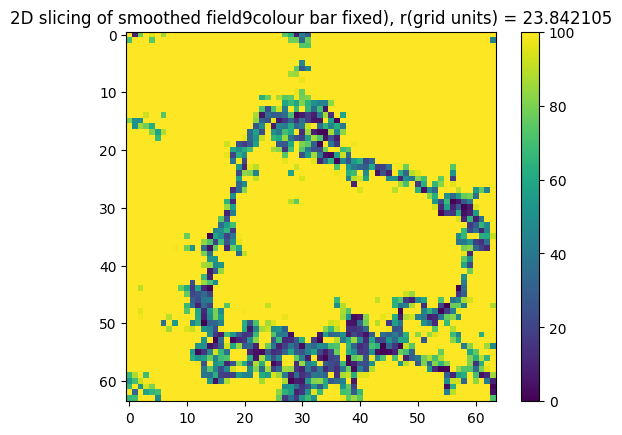

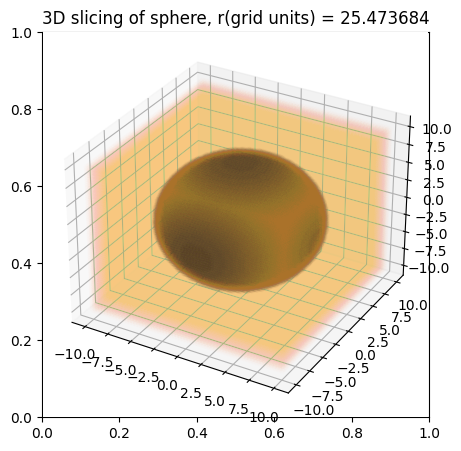

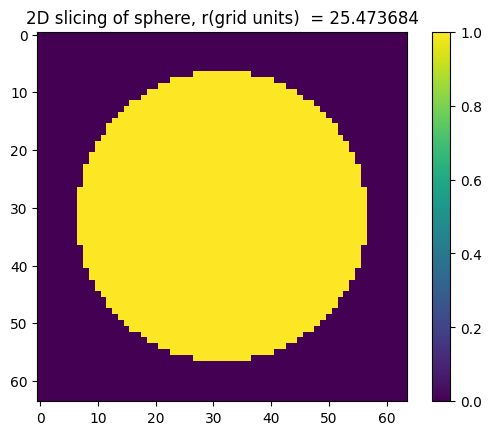

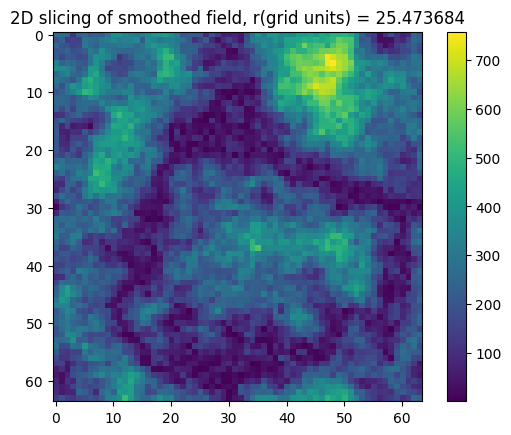

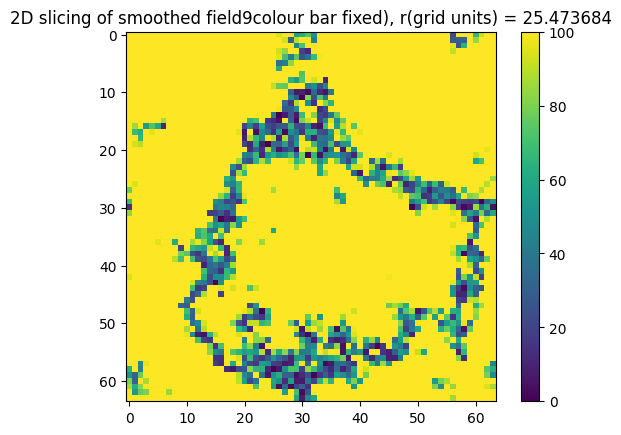

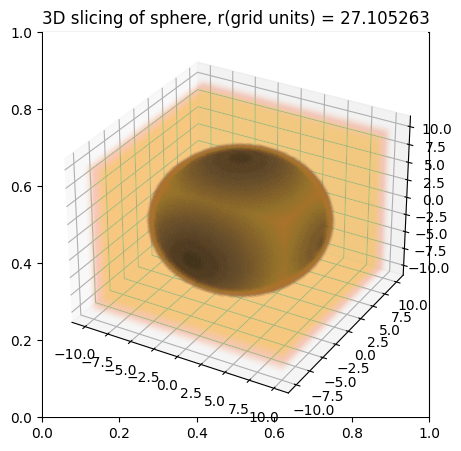

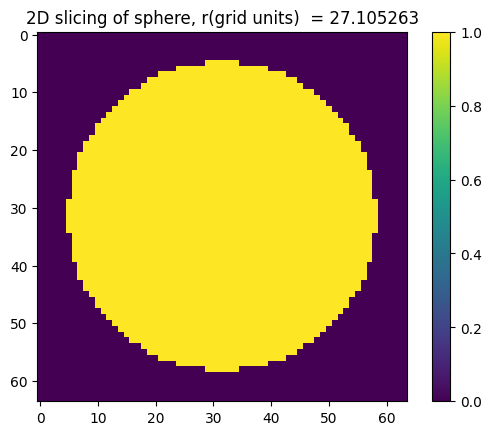

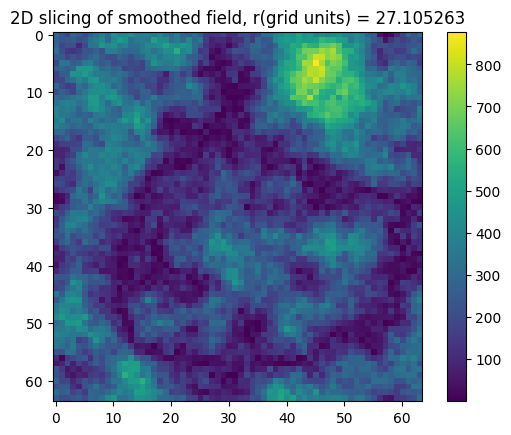

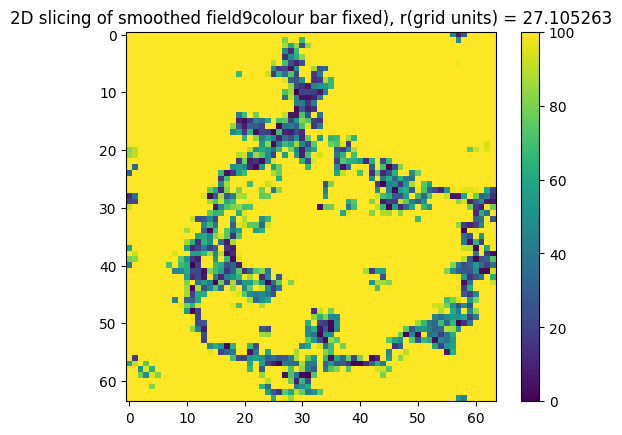

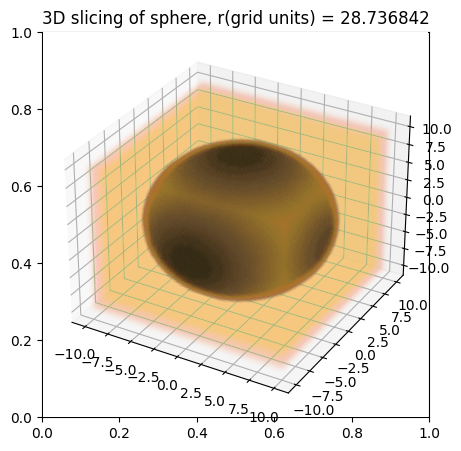

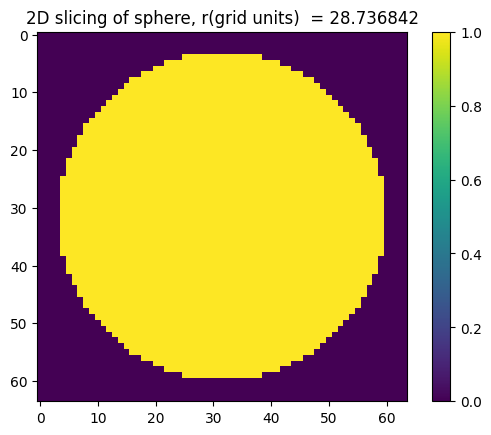

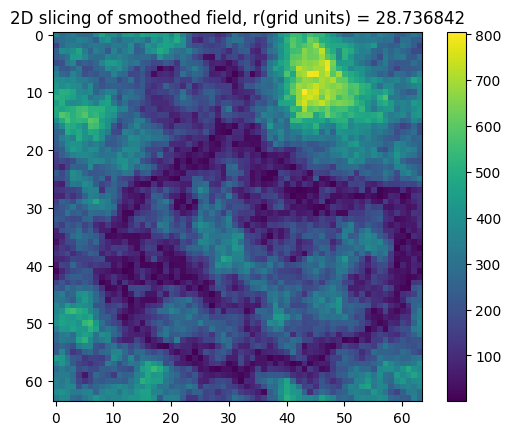

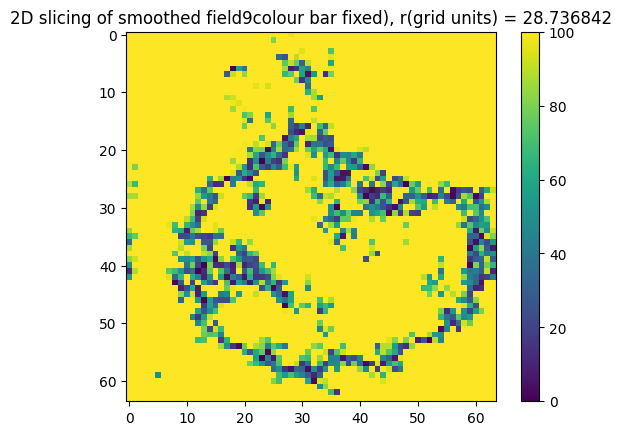

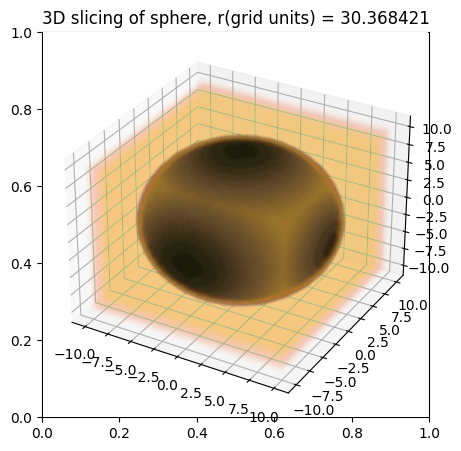

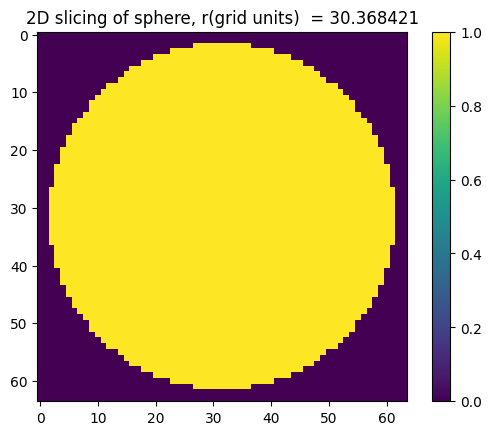

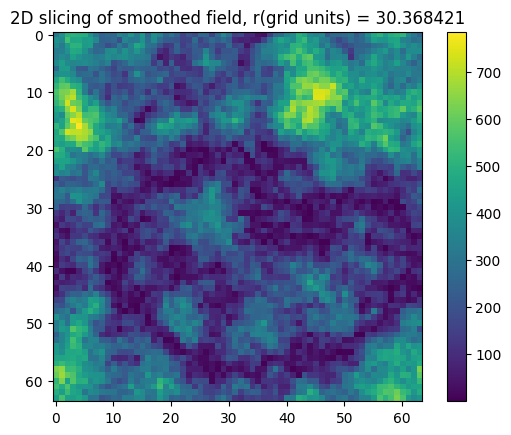

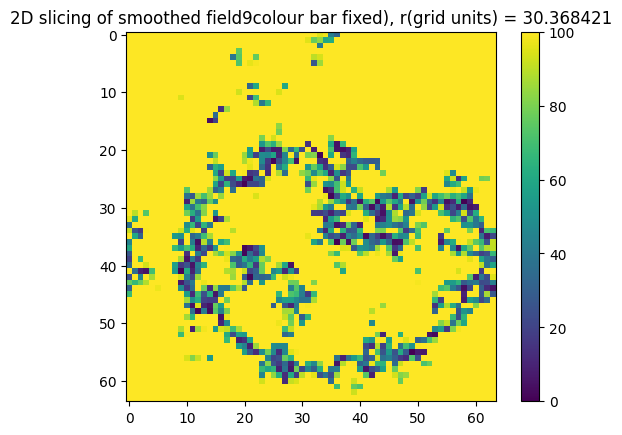

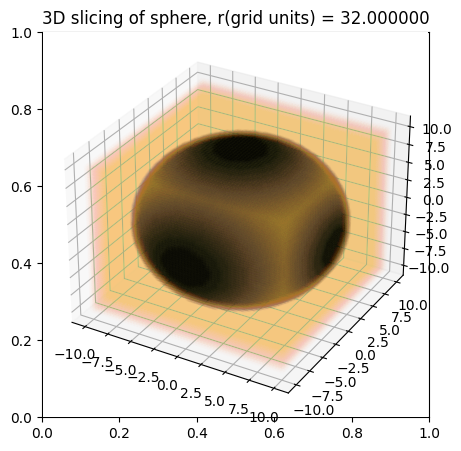

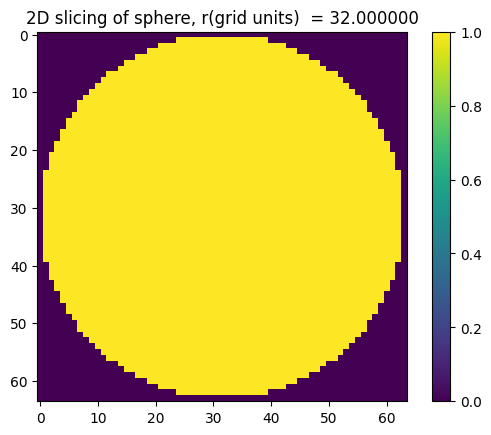

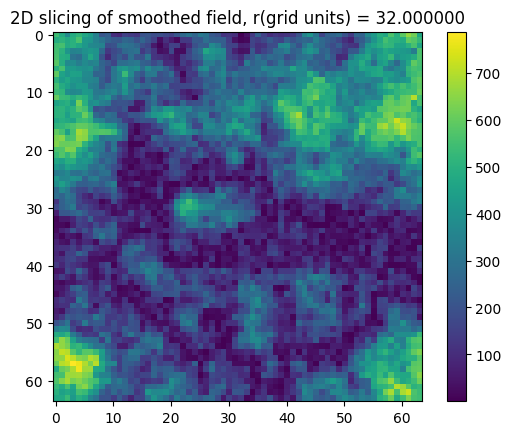

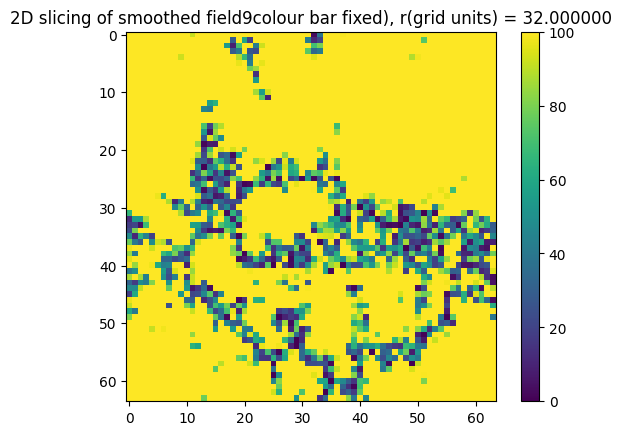

In [ ]:
for i in range (len(radius)):
  fig = plt.figure(figsize =(5,5))
  plt.title("3D slicing of sphere, r(grid units) = %f" %radius[i])
  ax = fig.add_subplot(projection='3d')
  ax.scatter3D(xm,ym,zm , c = -sphere(radius[i]) , alpha = 0.01, cmap = "copper")  # plotting spheres of different raii(grid units)
  plt.show()
  plt.title("2D slicing of sphere, r(grid units)  = %f" %radius[i])
  c = plt.imshow(sphere(radius[i])[32,:,:])
  fig.colorbar(c)
  plt.show()

  ft = np.fft.fftn( sphere(radius[i]))
  p = gft * ft
  ift = np.fft.ifftn(p)
  ift_shft = np.fft.ifftshift(ift)
  i_abs = np.abs(ift_shft)

  plt.title("2D slicing of smoothed field, r(grid units) = %f" %radius[i])
  e = plt.imshow(i_abs[0,:,:])
  fig.colorbar(e)
  plt.show()
  plt.title("2D slicing of smoothed field9colour bar fixed), r(grid units) = %f" %radius[i])
  d= plt.imshow(i_abs[0,:,:], vmin = 0.0 , vmax = 100)
  fig.colorbar(d)
  plt.show()





/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


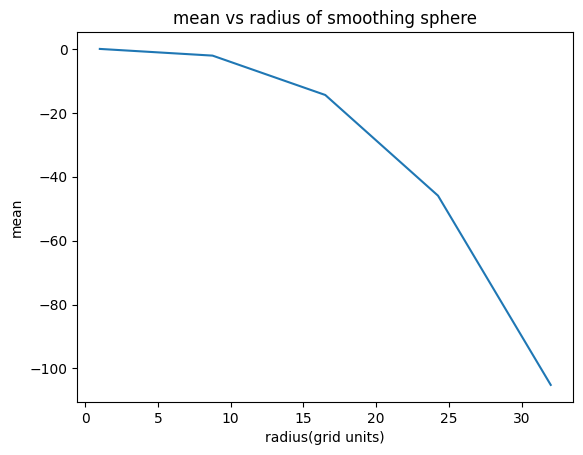

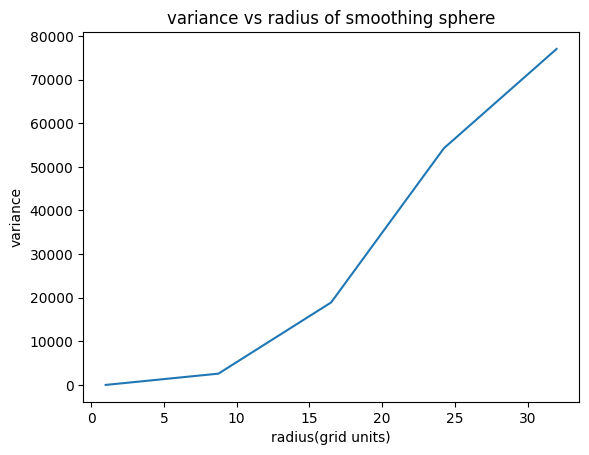

In [ ]:
# plotting mean and variance of smoothed field as a function of smoothing radius
mean = []
var = []
for i in range (len(radius)):
  ft = np.fft.fftn( sphere(radius[i]))
  p = gft * ft
  ift = np.fft.ifftn(p)
  ift_shft = np.fft.ifftshift(ift)
  #i_abs = np.abs(ift_shft)
  mean.append(np.mean(ift_shft))
  var.append(np.std(ift_shft)**2)


#plt.subplot(1,2,1)
plt.title("mean vs radius of smoothing sphere")
plt.plot(radius,mean)
plt.xlabel("radius(grid units)")
plt.ylabel("mean")
plt.show()
#plt.subplot(1,2,2)
plt.title("variance vs radius of smoothing sphere")
plt.plot(radius,var)
plt.xlabel("radius(grid units)")
plt.ylabel("variance")
plt.show()

11. From the plots, it is seen that the field is not actually getting smoothed as unnormalized filter is used for smoothing.


Smoothing filters are designed to remove high-frequency noise.The size of the smoothing filter determines the width of the averaging window, and the weights assigned to each data point in the window determine the degree of smoothing.When applying a smoothing filter to a dataset, the sum of the weights assigned to the data points in the filter window should be equal to 1. This ensures that the average of the data points is preserved and that the smoothed data is not biased or distorted.If the smoothing filter is not normalized, the sum of the weights may be greater than 1 or less than 1, which can result in an output signal that is distorted or shifted from the original data. In some cases, this can lead to artifacts or inconsistencies in the smoothed data that can affect the accuracy and reliability of any downstream analysis or modeling.

Normalizing the smoothing filter ensures that the sum of the weights is equal to 1, which preserves the original mean value of the data and ensures that the smoothing operation does not introduce any bias or distortion. This helps to ensure that the smoothed data is consistent with the original data and can be used for accurate analysis and modeling.

In [ ]:
# modified code

def sp(r):
  l = 20/64
  s = np.sqrt(xm**2 + ym**2 + zm**2)         # since, i have taken 20length units  in 64 grid units . 1 smallest length unit = 20/64
  sphr = np.zeros([64,64,64])              #sphere
  pixel = 0
  for x in range (64):
    for y in range (64):
      for z in range (64):
        if s[x,y,z] <= r * l :
          sphr[x, y, z] = 1
          pixel+=1

  return sphr/pixel   # normalised sphere

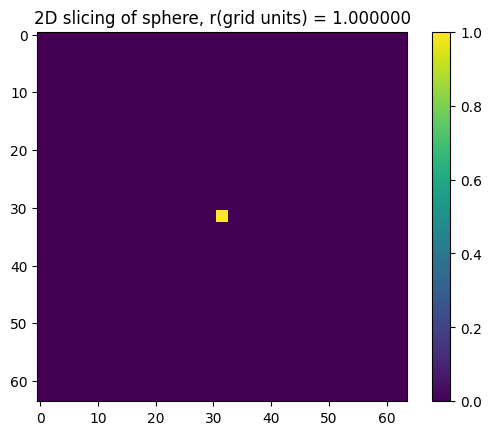

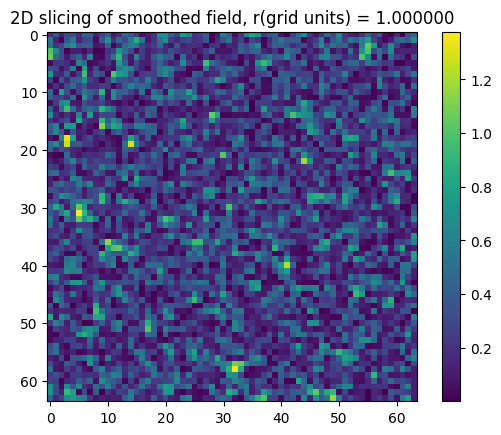

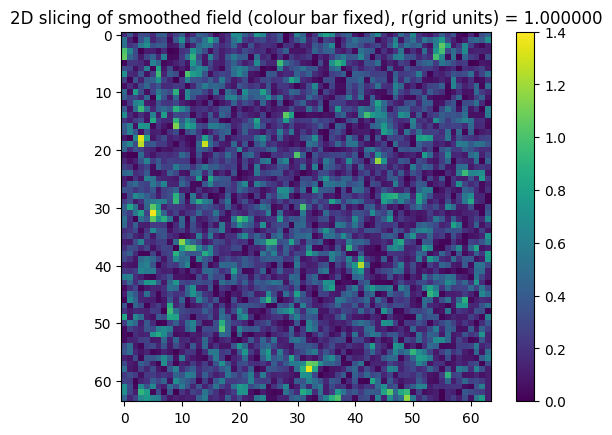

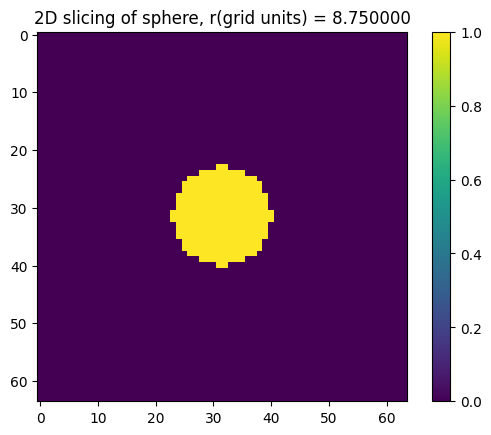

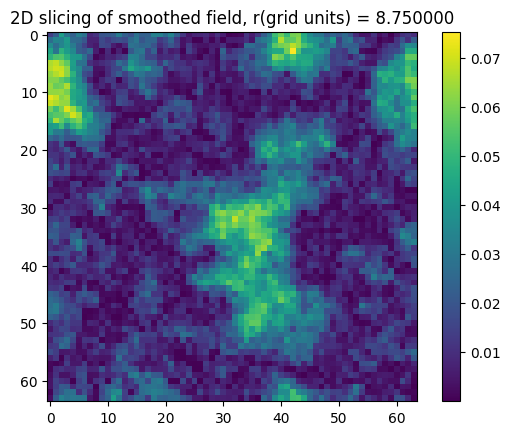

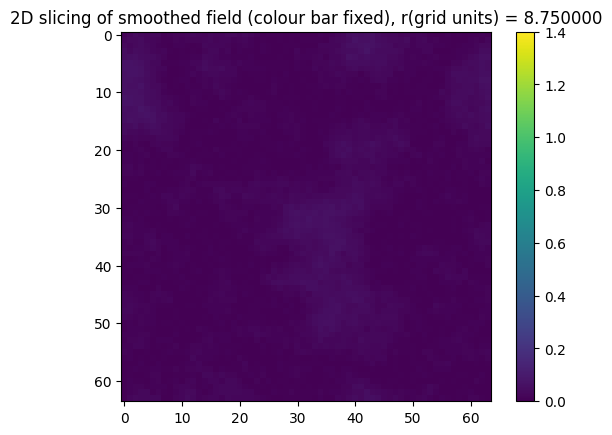

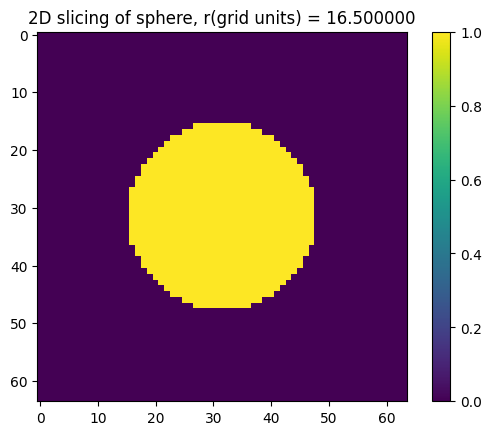

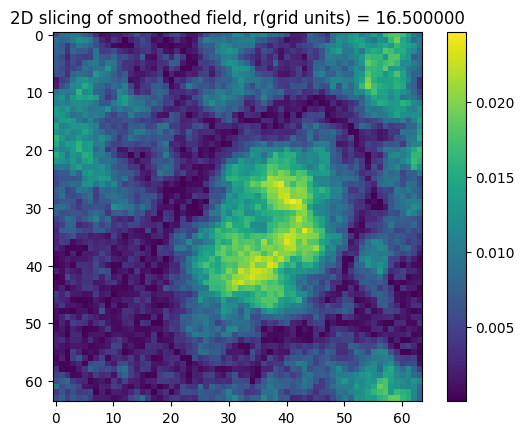

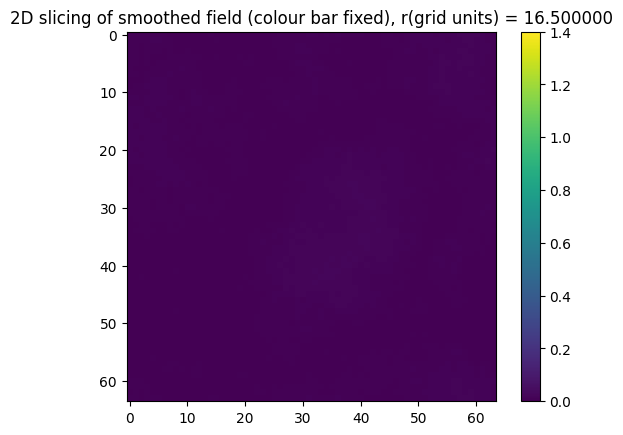

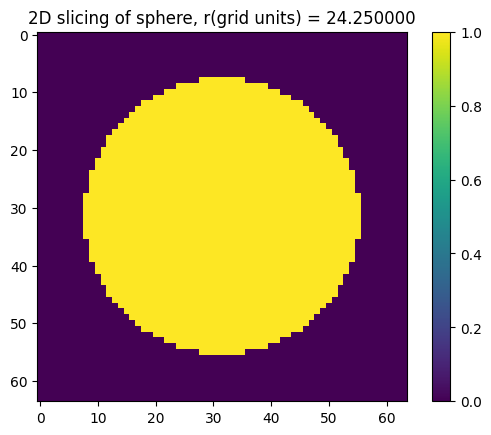

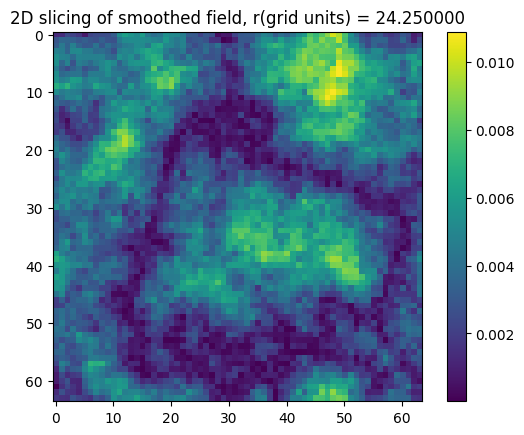

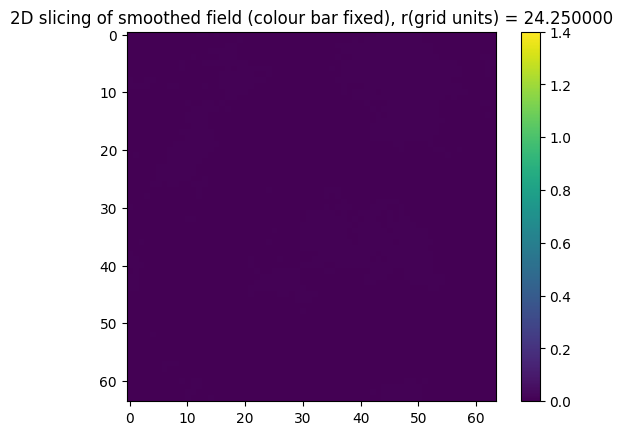

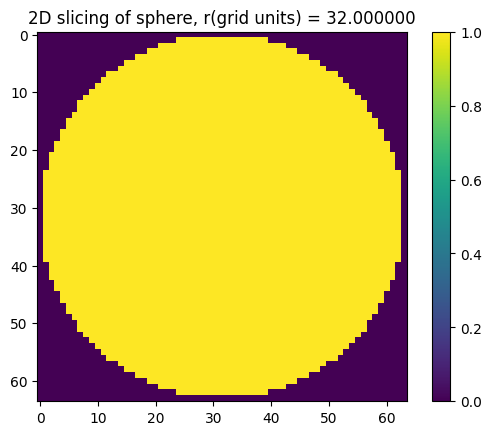

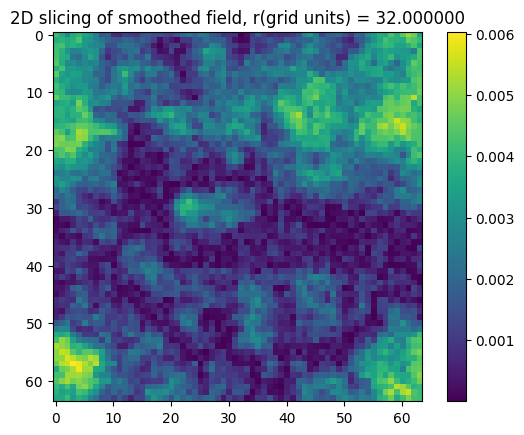

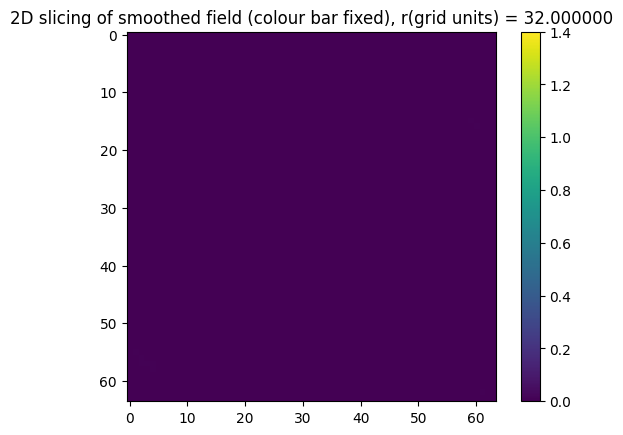

In [ ]:
for i in range (len(radius)):
  plt.title("2D slicing of sphere, r(grid units) = %f" %radius[i])
  c = plt.imshow(sphere(radius[i])[32,:,:])
  fig.colorbar(c)
  plt.show()

  ft = np.fft.fftn( sp(radius[i]))
  p = gft * ft
  ift = np.fft.ifftn(p)
  ift_shft = np.fft.ifftshift(ift)
  i_abs = np.abs(ift_shft)
  plt.title("2D slicing of smoothed field, r(grid units) = %f" %radius[i])
  e = plt.imshow(i_abs[0,:,:])
  fig.colorbar(e)
  plt.show()
  plt.title("2D slicing of smoothed field (colour bar fixed), r(grid units) = %f" %radius[i])
  d= plt.imshow(i_abs[0,:,:] , vmin = 0.0, vmax = 1.4)
  fig.colorbar(d)
  plt.show()

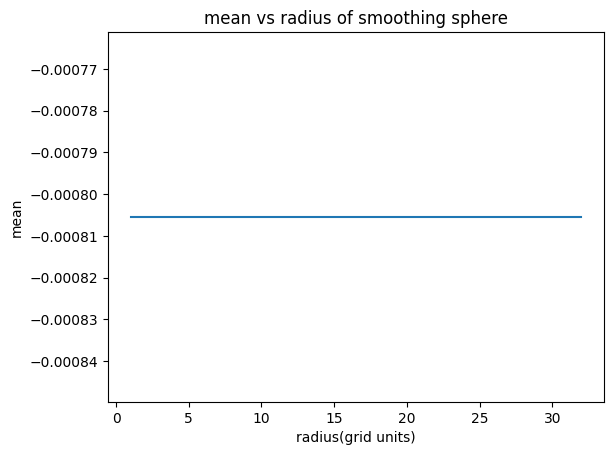

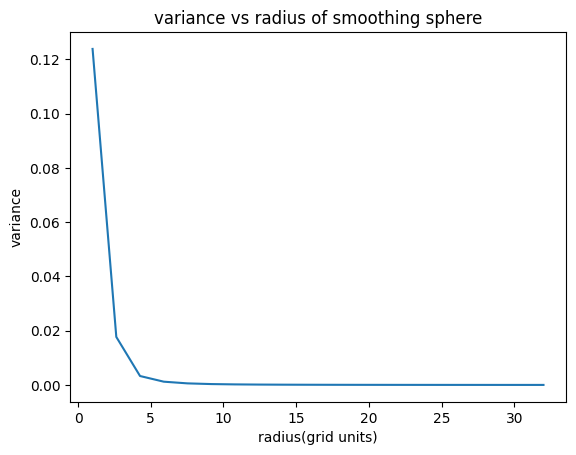

In [ ]:
# plotting mean and variance of smoothed field as a function of smoothing radius (normalised)
radius = np.linspace(1,32,20)
mean = []
var = []
for i in range (len(radius)):
  ft = np.fft.fftn( sp(radius[i]))
  p = gft * ft
  ift = np.fft.ifftn(p)
  ift_shft = np.fft.ifftshift(ift)
  #i_abs = np.abs(ift_shft)
  mean.append(np.mean(ift_shft))
  var.append(np.std(ift_shft)**2)


#plt.subplot(1,2,1)
plt.title("mean vs radius of smoothing sphere")
plt.plot(radius,mean)
plt.xlabel("radius(grid units)")
plt.ylabel("mean")
plt.show()
#plt.subplot(1,2,2)
plt.title("variance vs radius of smoothing sphere")
plt.plot(radius,var)
plt.xlabel("radius(grid units)")
plt.ylabel("variance")
plt.show()

12 . The implicit assumption regarding the field that has to be satisfied for the smoothing operation through
convolution to work is that the field should be locally stationary (i.e. mean and variance are constant over time and small region of space)